In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
# Загрузка датасета
df = pd.read_csv('spotify-2023.csv', encoding="latin-1")

# Вывод информации о датасете
print(df.info())
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [14]:
з# Проверка на дубликаты
duplicates = df[df.duplicated()]
print("Дубликаты:")
print(duplicates)

#Соответственно дубликатов нет

Дубликаты:
Empty DataFrame
Columns: [track_name, artist(s)_name, artist_count, released_year, released_month, released_day, in_spotify_playlists, in_spotify_charts, streams, in_apple_playlists, in_apple_charts, in_deezer_playlists, in_deezer_charts, in_shazam_charts, bpm, key, mode, danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_%, speechiness_%]
Index: []

[0 rows x 24 columns]


In [18]:
# Проверка на пустые значения
null_values = df.isnull().sum()
print("Пустые значения:")
print(null_values)
# Пустые значения найдены, удалим их, в целом можно везде сразу
df = df.dropna()

Пустые значения:
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


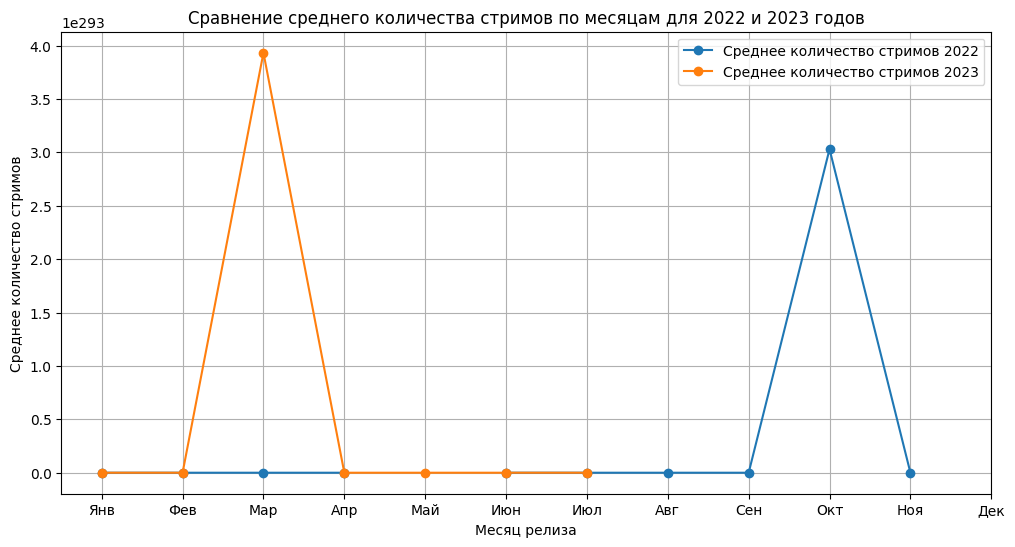

In [24]:
#Matplotlib
# У меня не супер креативное мышление, поэтому сравним среднее кол-во стримов
# песен выпущенных в 2022 и 2023
# Создадим два поддатасета для сравнения для годов 2022 и 2023
df_2022 = df[df['released_year'] == 2022]
df_2023 = df[df['released_year'] == 2023]

# Группировка данных по месяцу и вычисление среднего количества стримов
mean_streams_2022 = df_2022.groupby('released_month')['streams'].mean()
mean_streams_2023 = df_2023.groupby('released_month')['streams'].mean()

# Создание графика
plt.figure(figsize=(12, 6))
plt.plot(mean_streams_2022.index, mean_streams_2022, label='Среднее количество стримов 2022', marker='o')
plt.plot(mean_streams_2023.index, mean_streams_2023, label='Среднее количество стримов 2023', marker='o')
plt.xlabel("Месяц релиза")
plt.ylabel("Среднее количество стримов")
plt.title("Сравнение среднего количества стримов по месяцам для 2022 и 2023 годов")
plt.legend()
plt.grid(True)

# Добавим подписи к месяцам
month_names = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']
plt.xticks(mean_streams_2022.index, month_names)

plt.show()


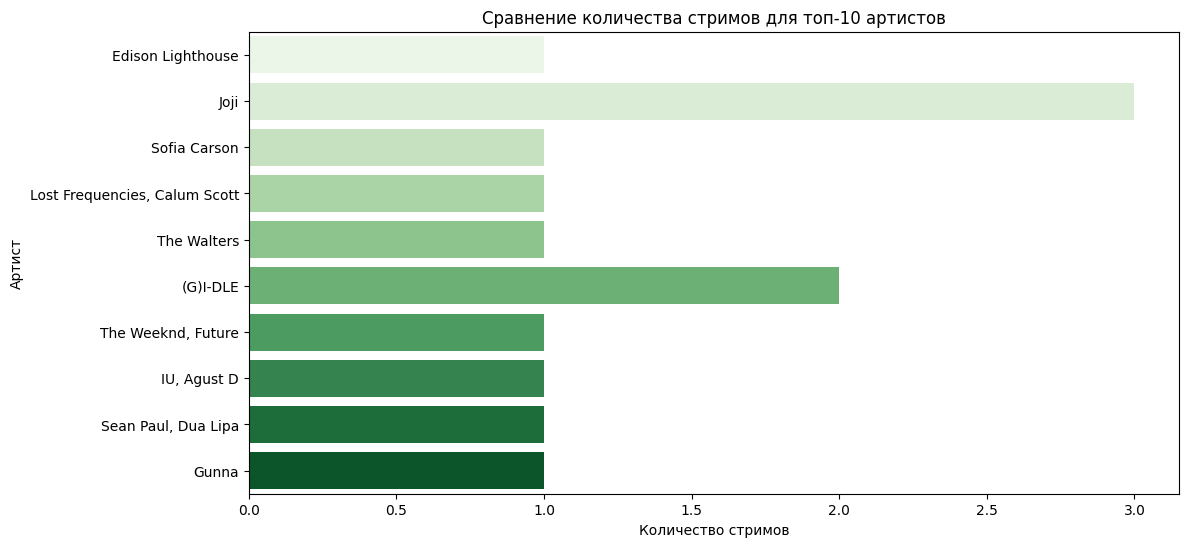

In [33]:
#Seaborn

top_artists = df.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(10).index

df_top_artists = df[df['artist(s)_name'].isin(top_artists)]

custom_palette = sns.color_palette("Greens", n_colors=len(top_artists))
sns.set_palette(custom_palette)
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_artists, y='artist(s)_name', order=top_artists)
plt.xlabel("Количество стримов")
plt.ylabel("Артист")
plt.title("Сравнение количества стримов для топ-10 артистов")

plt.show()


In [45]:
#Bokeh
from bokeh.plotting import figure, show, output_notebook
import pandas as pd

p = figure(width=800, height=400, title="Зависимость дня релиза от количества рейтинга в Spotify Chart")

p.circle(x='released_day', y='in_spotify_charts', source=df, size=8, color="purple", alpha=0.6)


p.xaxis.axis_label = "День релиза"
p.yaxis.axis_label = "Количество рейтинга в Spotify Chart"


output_notebook()
show(p)


In [46]:
#Plotly Express
import plotly.express as px

fig = px.scatter(df, x='bpm', y='in_apple_playlists', title="Зависимость дня релиза от количества рейтинга в Apple Playlists")

fig.update_traces(marker=dict(size=10, opacity=0.6, color='purple'))

fig.update_xaxes(title_text="Beats per minute")
fig.update_yaxes(title_text="Количество рейтинга в Apple Playlists")

fig.show()
